In [16]:
#import packages required to run scripts
import numpy as np #numpy is numerical python.  It is a package so you can do math
import matplotlib.pyplot as plt #this package allows you to make nice plots
import pandas as pd


#Some basic notes:
# python is a zero-based indexing language.
# Use [] to access elements of an array
# Use () to denote arguments of a function.
# Contrast to matlab:
# If you have used matlab, it is a 1-based indexing language
# In matlab, you use () both to access elements of a matrix and to provide arguments to a function

In [17]:
#pandas.read_excel(io, sheet_name=0, *, header=0, names=None, index_col=None, usecols=None, dtype=None, engine=None, 
#converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, keep_default_na=True, 
#na_filter=True, verbose=False, parse_dates=False, date_parser=_NoDefault.no_default, date_format=None, thousands=None, 
#decimal='.', comment=None, skipfooter=0, storage_options=None, dtype_backend=_NoDefault.no_default, engine_kwargs=None)
#[source]

#Global_Carbon_Budget_2022v1.0.xlsx = file
# Historical Budget = tab 

filename='Global_Carbon_Budget_2022v1.0.xlsx'
tabname='Historical Budget'
budget=pd.read_excel(filename, sheet_name=tabname, header=15)

budget.rename(columns={"fossil emissions excluding carbonation": "fossil", # get rid of names with spaces
                       "land-use change emissions": "LUC",
                       "atmospheric growth": "atm_growth",
                       "land sink": "land_sink",
                       "ocean sink": "ocean_sink",
                       "cement carbonation sink": "cement_weathering",
                       "budget imbalance": "imbalance"}, inplace=True)
budget #look at the dataframe you have just loaded in


,Year,fossil,LUC,atm_growth,ocean_sink,land_sink,cement_weathering,imbalance
0,1750,0.002552,NaN,NaN,NaN,0.232276,NaN,NaN
1,1751,0.002552,NaN,-0.074340,NaN,-0.505378,NaN,NaN
2,1752,0.002553,NaN,-0.070729,NaN,-0.222229,NaN,NaN
3,1753,0.002553,NaN,-0.067756,NaN,-0.380279,NaN,NaN
4,1754,0.002554,NaN,-0.064145,NaN,-0.022557,NaN,NaN
...,...,...,...,...,...,...,...,...
267,2017,9.851730,1.182300,4.545360,2.854828,3.555004,0.202927,-0.124088
268,2018,10.050902,1.141200,5.033880,2.947231,3.647435,0.209702,-0.646145
269,2019,10.120786,1.243800,5.437440,2.994756,3.041949,0.214002,-0.323561
270,2020,9.624478,1.107467,4.991400,2.998115,3.105137,0.220563,-0.583270


In [18]:
tabname='Fossil Emissions by Category'
fossil=pd.read_excel(filename, sheet_name=tabname, header=8)
fossil
fossil.rename(columns={"fossil.emissions.excluding.carbonation": "fossil", #get rid of names with spaces
                       "Cement.emission": "cement",
                       "Per.Capita": "percapita"}, inplace=True)
fossil

,Year,fossil,Coal,Oil,Gas,cement,Flaring,Other,percapita
0,1850,53.738000,53.738000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042559
1,1851,54.259000,54.259000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042753
2,1852,56.646000,56.646000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044407
3,1853,59.282000,59.282000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046238
4,1854,69.634000,69.634000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054038
...,...,...,...,...,...,...,...,...,...
167,2017,9851.730152,3959.326912,3341.328585,1950.034970,411.551088,106.984764,82.503834,1.296311
168,2018,10050.902456,4024.790035,3347.711868,2055.089188,428.280129,112.477005,82.554232,1.308066
169,2019,10120.785745,4019.098806,3369.446882,2087.207484,441.459276,119.883731,83.689567,1.303393
170,2020,9624.477547,3868.603715,3054.532901,2062.306300,446.926182,111.240085,80.868364,1.227463


In [19]:
budget.dtypes #what are the data? are they integers? floats? strings?
#year is integer and rest are floats

Year                   int64
fossil               float64
LUC                  float64
atm_growth           float64
ocean_sink           float64
land_sink            float64
cement_weathering    float64
imbalance            float64
dtype: object

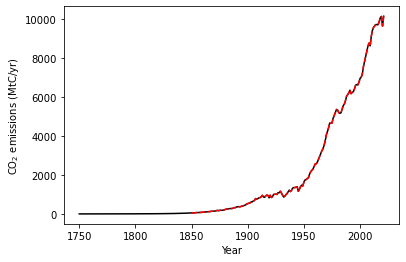

In [20]:
#Plot a figure showing fossil fuel emissions
plt.figure()
plt.plot(budget.Year, 10**3*budget.fossil, color=[0,0,0]) # pay attention to units! Why the factor of 1000?
# Units were in billion tonnes of carbon per year (GtC/yr) but multiplied by 1000 to be in million tonnes 
# of carbon per year (MtC/yr) since fossil.fossil units are MtC/yr
plt.plot(fossil.Year, fossil.fossil, 'r--') #Consistency check! Are the two datasets the same?
plt.xlabel('Year')
plt.ylabel(r'CO$_2$ emissions (MtC/yr)') # Check for units and add units to your figure!!
plt.savefig('CO2_Emissions.eps')

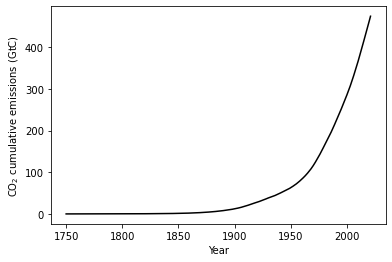

In [50]:
#Calculate cumulative Emission since 1751
cumFF=np.cumsum(budget.fossil)

# Write some lines of code to make a plot of cumulative emissions
# Add Labels, Check for Units!
plt.figure()
plt.plot(budget.Year, cumFF, color=[0,0,0]) 
plt.xlabel('Year')
plt.ylabel(r'CO$_2$ cumulative emissions (GtC)') # Units are GtC or PgC
plt.savefig('CO2_Cumulative_Emissions.png')

In [22]:
#Calculate cumulative Emission since 1990 (or any arbitrary year!)
#print(cumFF)
startindex=np.where(budget.Year==2010)[0]
FFcum_2010=cumFF.iloc[-1]-cumFF.iloc[startindex]
print(FFcum_2010) # since 1990, cumulative emissions is ~253.5 

#Your turn: Add code to calculate fraction of fossil fuels emitted since 1990
startindex=np.where(budget.Year==1750)[0]
FFcum_1750=cumFF.iloc[-1]-cumFF.iloc[startindex]
print(FFcum_1750) # since 1750, cumulative emissions is ~474.1
fraction = 107.49632 / 474.050403
print(fraction) # 1990 fraction is ~0.5

260    107.49632
Name: fossil, dtype: float64
0    474.050403
Name: fossil, dtype: float64
0.22676137246106295


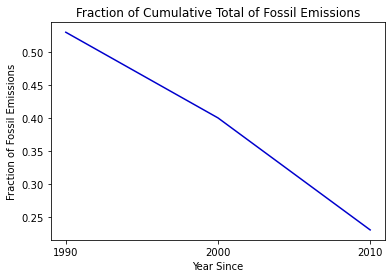

In [51]:
yearly = ["1990","2000","2010"]
yearly_trend = [0.53,0.40,0.23]

plt.figure()
plt.plot(yearly, yearly_trend,color='mediumblue') 
plt.title('Fraction of Cumulative Total of Fossil Emissions')
plt.xlabel('Year Since')
plt.ylabel(r'Fraction of Fossil Emissions') 
plt.savefig('Fraction_Emissions.png')

In [23]:
# Finding what fraction of total emissions is due to coal then gas
coal = fossil.Coal[171]
gas = fossil.Gas[171]
total = fossil.fossil[171]
print(coal/total)
print(gas/total)

0.40350335272666427
0.21338922006407948


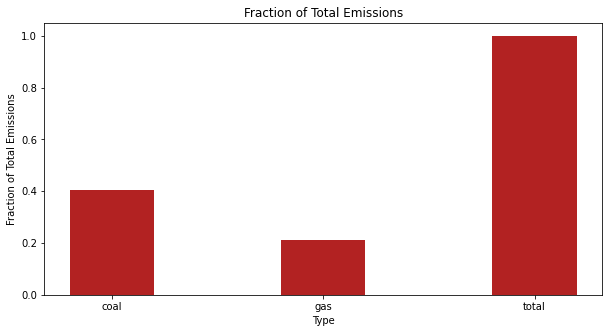

In [55]:
type_energy = [coal/total,gas/total,total/total]
energy_type = ["coal","gas","total"]

fig = plt.figure(figsize = (10, 5))
plt.bar(energy_type, type_energy, color ='firebrick',width = 0.4) 
plt.title('Fraction of Total Emissions')
plt.xlabel('Type')
plt.ylabel(r'Fraction of Total Emissions') 
plt.savefig('Fraction_Total_Emissions.png')

In [43]:
# Calculate decadal Growth Rate in emissions
#you will need to "rinse and repeat" starting with different years
indx=np.where(budget.Year==2000)[0] 
print(indx) 

# Why do we have that [0] in the first line of code:
# Modify the first line to remove the [0]
# How do the results from the print statements differ with and without the [0]?  
# Code won't run without the [0]
# [0] is telling python to access the first element of the array (0 is first)
# If you don't include which element you want to see, python won't know and won't run it

decade=np.arange(indx, indx+10)

p1=np.polyfit(budget.Year[decade],budget.fossil[decade],1 ) # you are fitting a linear trend for ten years of data
trend=p1[0] # PgC/y/y
relativetrend=trend/budget.fossil[indx]*100 # %/y
print(trend) 
print(relativetrend) 

[250]
0.22470791953323072
250    3.234627
Name: fossil, dtype: float64


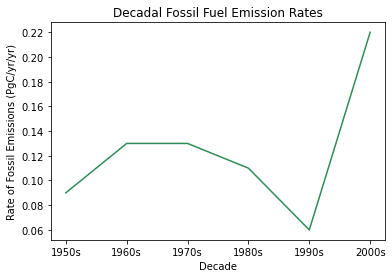

In [47]:
decadal = ["1950s","1960s","1970s","1980s","1990s","2000s"]
decadal_trend = [0.09,0.13,0.13,0.11,0.06,0.22]

plt.figure()
plt.plot(decadal, decadal_trend,color='seagreen') 
plt.title('Decadal Fossil Fuel Emission Rates')
plt.xlabel('Decade')
plt.ylabel(r'Rate of Fossil Emissions (PgC/yr/yr)') 
plt.savefig('Rates_Emissions.png')

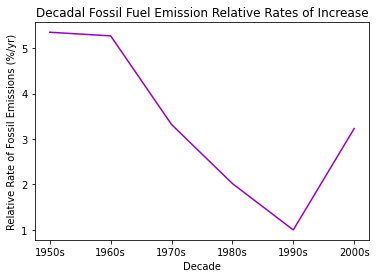

In [48]:
decadal = ["1950s","1960s","1970s","1980s","1990s","2000s"]
decadal_trend = [5.35,5.27,3.32,2.02,1,3.23]

plt.figure()
plt.plot(decadal, decadal_trend,color='darkviolet') 
plt.title('Decadal Fossil Fuel Emission Relative Rates of Increase')
plt.xlabel('Decade')
plt.ylabel(r'Relative Rate of Fossil Emissions (%/yr)') 
plt.savefig('Rel_Rates_Emissions.png')